In [ ]:
#C218 KISHAN SINGH
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression as slr

In [ ]:
#C218 KISHAN SINGH
da=pd.read_csv('/content/WorldCups_C218.csv')
da

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.81
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [ ]:
#C218 KISHAN SINGH
da.shape

(20, 10)

In [ ]:
da.head()  #C218 KISHAN SINGH

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [ ]:
#C218 KISHAN SINGH
data = da.loc[:,('Year','Country', 'Winner', 'Runners-Up','GoalsScored','QualifiedTeams','MatchesPlayed','Attendance')]
data.head() 

,Year,Country,Winner,Runners-Up,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,70,16,17,363
2,1938,France,Italy,Hungary,84,15,18,375.7
3,1950,Brazil,Uruguay,Brazil,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,140,16,26,768.607


In [ ]:
#C218 KISHAN SINGH
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   GoalsScored     20 non-null     int64 
 5   QualifiedTeams  20 non-null     int64 
 6   MatchesPlayed   20 non-null     int64 
 7   Attendance      20 non-null     object
dtypes: int64(4), object(4)
memory usage: 1.4+ KB


In [ ]:
#C218 KISHAN SINGH
duplicateRowsDF = data[data.duplicated()]
duplicateRowsDF

,Year,Country,Winner,Runners-Up,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance


In [ ]:
# Check for missing data
data.isnull().sum()  #C218 KISHAN SINGH

Year              0
Country           0
Winner            0
Runners-Up        0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

In [ ]:
# Drop the missing values
data.dropna(inplace = True)  #C218 KISHAN SINGH

In [ ]:
#Dataset after missing values are dropped
data.shape  #C218 KISHAN SINGH

(20, 8)

In [ ]:
data.columns = ['Year','Country','Winner','Runners-Up', 'GoalsScored','QualifiedTeams','MatchesPlayed','Attendance']

In [ ]:
data.head()

,Year,Country,Winner,Runners-Up,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,70,16,17,363
2,1938,France,Italy,Hungary,84,15,18,375.7
3,1950,Brazil,Uruguay,Brazil,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,140,16,26,768.607


In [ ]:
data.drop('Attendance',axis=1)

,Year,Country,Winner,Runners-Up,GoalsScored,QualifiedTeams,MatchesPlayed
0,1930,Uruguay,Uruguay,Argentina,70,13,18
1,1934,Italy,Italy,Czechoslovakia,70,16,17
2,1938,France,Italy,Hungary,84,15,18
3,1950,Brazil,Uruguay,Brazil,88,13,22
4,1954,Switzerland,Germany FR,Hungary,140,16,26
5,1958,Sweden,Brazil,Sweden,126,16,35
6,1962,Chile,Brazil,Czechoslovakia,89,16,32
7,1966,England,England,Germany FR,89,16,32
8,1970,Mexico,Brazil,Italy,95,16,32
9,1974,Germany,Germany FR,Netherlands,97,16,38


In [ ]:
numerical = ['GoalsScored','QualifiedTeams','MatchesPlayed','Attendance']
data[numerical].describe() 

,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000
mean,118.950000,21.250000,41.800000
std,32.972836,7.268352,17.218717
min,70.000000,13.000000,17.000000
25%,89.000000,16.000000,30.500000
50%,120.500000,16.000000,38.000000
75%,145.250000,26.000000,55.000000
max,171.000000,32.000000,64.000000


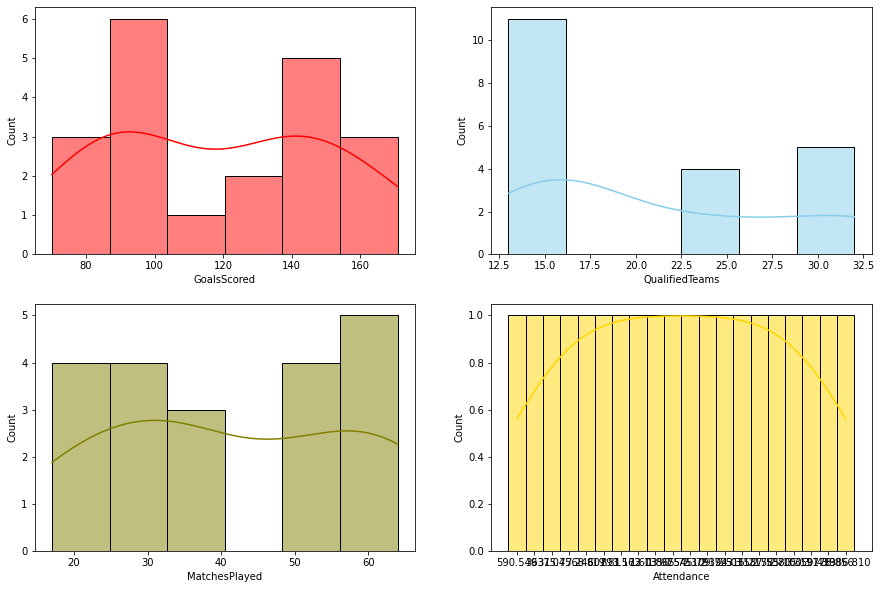

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(15, 10))  #C218 KISHAN SINGH
sns.histplot(data= data, x="GoalsScored", kde=True, color="red", ax=axs[0,0])
sns.histplot(data= data, x="QualifiedTeams", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= data, x="MatchesPlayed", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data= data, x="Attendance", kde=True, color="gold", ax=axs[1,1])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


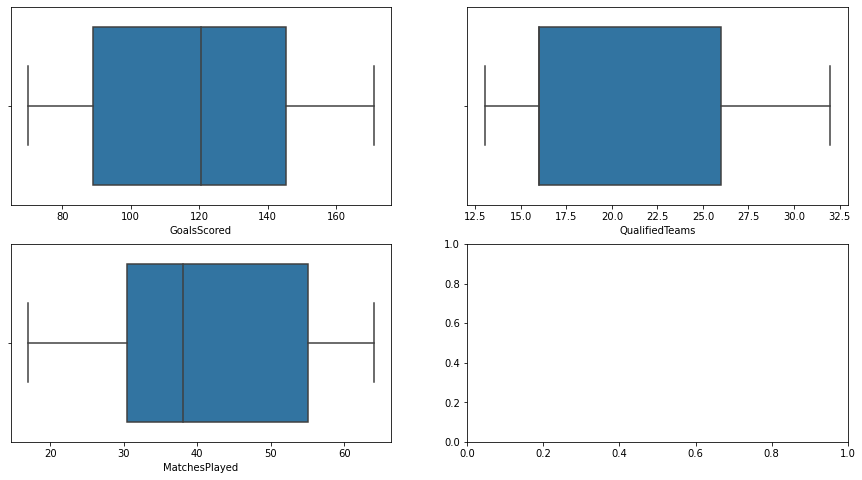

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(15,8))  #C218 KISHAN SINGH
sns.boxplot(data['GoalsScored'], ax = axs[0,0])
sns.boxplot(data['QualifiedTeams'], ax = axs[0,1])
sns.boxplot(data['MatchesPlayed'], ax = axs[1,0])


In [ ]:
qh25, qh50, qh75 = np.percentile(data['MatchesPlayed'], [25,50,75])  #C218 KISHAN SINGH
iqrh = qh75-qh25
minh = qh25 - 1.5*iqrh
maxh = qh75 + 1.5*iqrh
data = data[(data['MatchesPlayed'] > minh) & (data['MatchesPlayed'] < maxh)]
maxh

91.75

In [ ]:
qw25, qw50, qw75 = np.percentile(data['QualifiedTeams'], [25,50,75])  #C218 KISHAN SINGH
iqrw = qw75-qw25
maxw = qh75 + 1.5*iqrw
data = data[data['QualifiedTeams'] < maxw]
maxw

70.0

In [ ]:
qb25, qb50, qb75 = np.percentile(data['GoalsScored'], [25,50,75])  #C218 KISHAN SINGH
iqrb = qb75-qb25
maxb = qb75 + 1.5*iqrb
data = data[data['GoalsScored'] < maxb]
maxb

229.625

In [ ]:
data.shape  #C218 KISHAN SINGH

(20, 8)

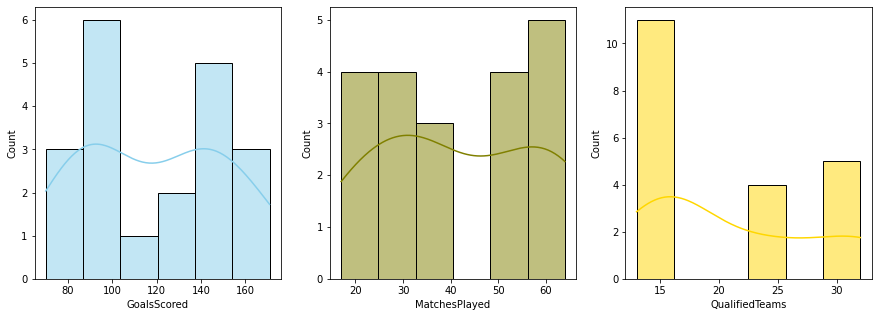

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))  #C218 KISHAN SINGH
sns.histplot(data= data, x="GoalsScored", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data= data, x="MatchesPlayed", kde=True, color="olive", ax=axs[1])
sns.histplot(data= data, x="QualifiedTeams", kde=True, color="gold", ax=axs[2])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


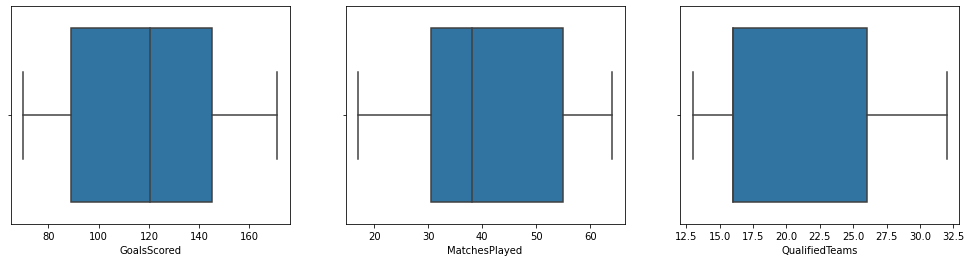

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(17, 4))  #C218 KISHAN SINGH
sns.boxplot(data['GoalsScored'], ax = axs[0])
sns.boxplot(data['MatchesPlayed'], ax = axs[1])
sns.boxplot(data['QualifiedTeams'], ax = axs[2])
plt.show()

Feature Engineering

One Hot Encoding

In [ ]:
data['Winner'] = data.Winner.replace({1 : 'Uruguay', 2 : 'Italy'})
data['Winner']

0        Uruguay
1          Italy
2          Italy
3        Uruguay
4     Germany FR
5         Brazil
6         Brazil
7        England
8         Brazil
9     Germany FR
10     Argentina
11         Italy
12     Argentina
13    Germany FR
14        Brazil
15        France
16        Brazil
17         Italy
18         Spain
19       Germany
Name: Winner, dtype: object

In [ ]:
categorical = data[['GoalsScored','MatchesPlayed','QualifiedTeams']]  #C218 KISHAN SINGH
categorical.head() 

,GoalsScored,MatchesPlayed,QualifiedTeams
0,70,18,13
1,70,17,16
2,84,18,15
3,88,22,13
4,140,26,16


In [ ]:
dummy = pd.get_dummies(categorical,drop_first=True)  #C218 KISHAN SINGH
dummy

,GoalsScored,MatchesPlayed,QualifiedTeams
0,70,18,13
1,70,17,16
2,84,18,15
3,88,22,13
4,140,26,16
5,126,35,16
6,89,32,16
7,89,32,16
8,95,32,16
9,97,38,16


Log transform of skewed variables

In [ ]:
numerical = data[['GoalsScored','MatchesPlayed','QualifiedTeams']] #C218 KISHAN SINGH
skew_limit = 0.75 
skew_vals = numerical.skew()
skew_vals

GoalsScored       0.079362
MatchesPlayed     0.020391
QualifiedTeams    0.574147
dtype: float64

Pairplot Feature

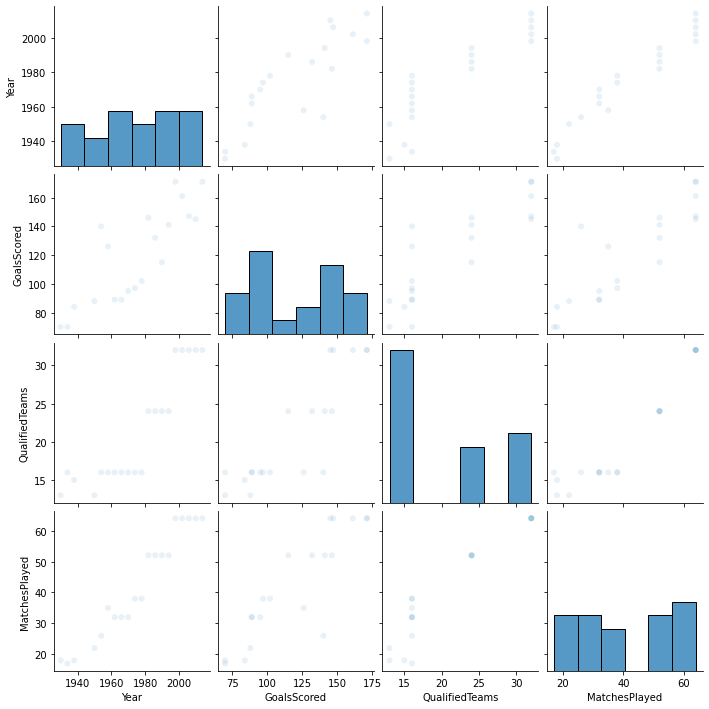

In [ ]:
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))  #C218 KISHAN SINGH

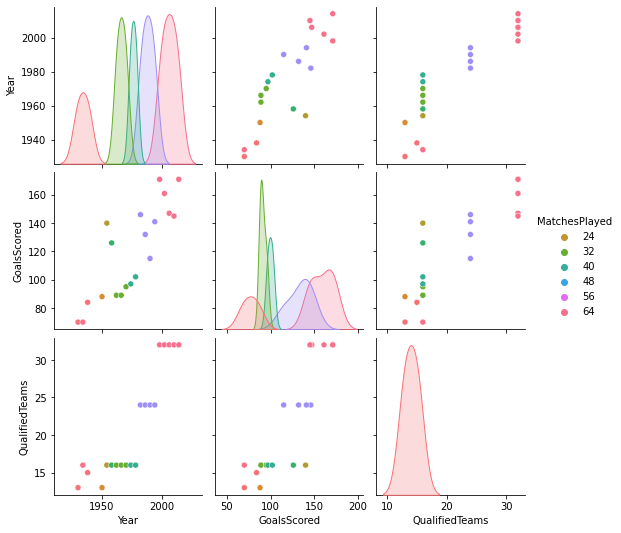

In [ ]:
sns.pairplot(data, hue = 'MatchesPlayed', palette = 'husl')  #C218 KISHAN SINGH

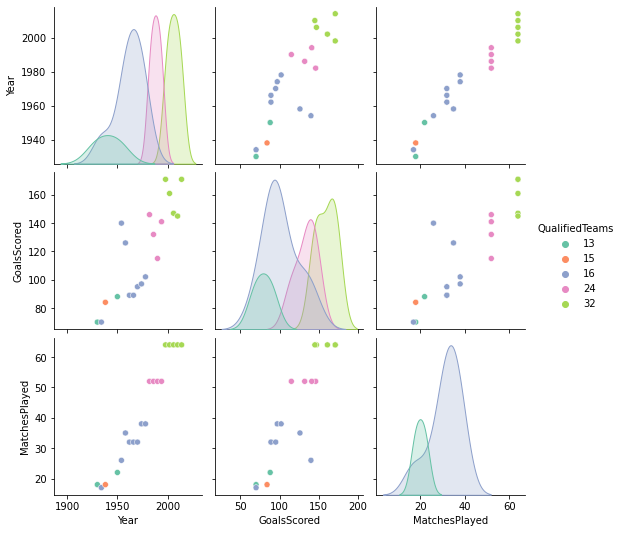

In [ ]:
sns.pairplot(data, hue = 'QualifiedTeams', palette = 'Set2')  #C218 KISHAN SINGH